In [22]:
import time
import os
import numpy as np
from PIL import Image, ImageDraw
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [2]:
%run ../sqlite_execution.py
db2 = DB_V2(dir_prefix="../")

In [3]:
from selenium import webdriver

options = webdriver.ChromeOptions()
options.add_argument("--enable-features=DarkMode")
# options.add_argument("--headless")

wd = webdriver.Chrome(options)
wd.get("https://accounts.hcaptcha.com/demo")

(237.05866700410843, 347.37381196022034)


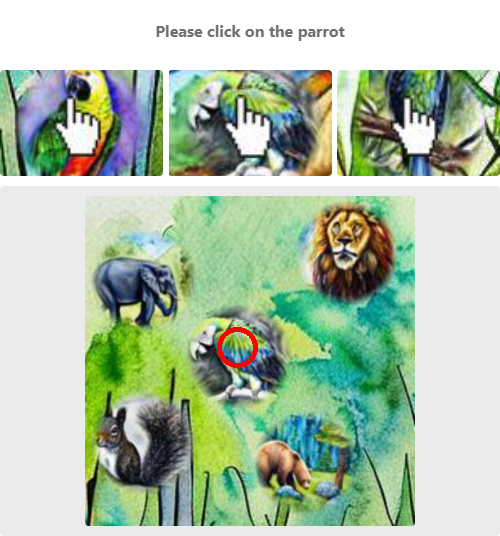

(236.91780829429626, 348.7676621079445)


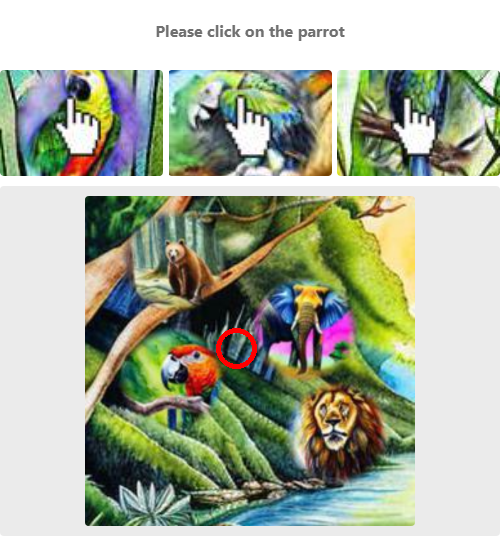

In [27]:
image_paths, positions = db2.get_captchas()
for i in range(len(image_paths)):
    print(positions[i])
    image = Image.open("../"+image_paths[i])

    draw = ImageDraw.Draw(image)  
  
    x, y = positions[i]  
    radius = 20  
    box = [positions[i][0] - radius, positions[i][1] - radius, positions[i][0] + radius, positions[i][1] + radius] 

    draw.ellipse(box, fill=None, outline ="red", width=5)
    
    display(image)

Launched hCaptcha
Captcha V1 found, refreshing
Captcha V1 found, refreshing
Captcha V2 found
Found Image: (500, 536)


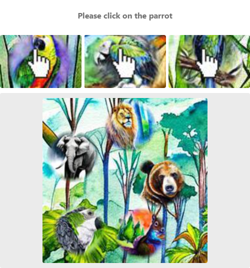

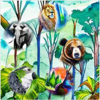

x shape: (1, 4, 536, 500)
prediction: [0.45619714 0.46524256]
absolute click: [152.36984563 154.92577404]
relative click: (235.3698456287384, 348.925774037838)
(235.3698456287384, 348.925774037838)


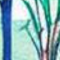

clicking on 235.3698456287384 348.925774037838
Submitted captcha
Found Image: (500, 536)


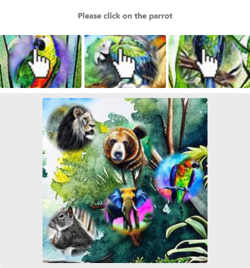

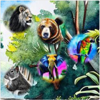

x shape: (1, 4, 536, 500)
prediction: [0.45385346 0.46361816]
absolute click: [151.58705503 154.38484704]
relative click: (234.5870550274849, 348.38484704494476)
(234.5870550274849, 348.38484704494476)


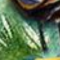

clicking on 234.5870550274849 348.38484704494476
Submitted captcha
Challenge was not solved, trying again...
Captcha V1 found, refreshing
Captcha V1 found, refreshing
Captcha V1 found, refreshing
Captcha V1 found, refreshing
Captcha V1 found, refreshing
Captcha V2 found
Found Image: (500, 536)


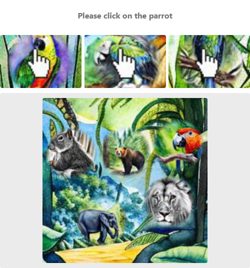

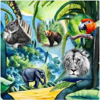

x shape: (1, 4, 536, 500)
prediction: [0.46196896 0.46508738]
absolute click: [154.2976321  154.87409887]
relative click: (237.29763209819794, 348.87409886717796)
(237.29763209819794, 348.87409886717796)


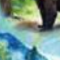

clicking on 237.29763209819794 348.87409886717796
Submitted captcha
Found Image: (500, 536)


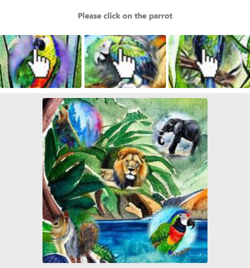

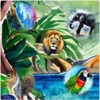

x shape: (1, 4, 536, 500)
prediction: [0.45781255 0.46528488]
absolute click: [152.90939093 154.93986636]
relative click: (235.90939092636108, 348.9398663640022)
(235.90939092636108, 348.9398663640022)


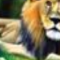

clicking on 235.90939092636108 348.9398663640022
Submitted captcha
Challenge was not solved, trying again...
Captcha V2 found
Found Image: (500, 536)


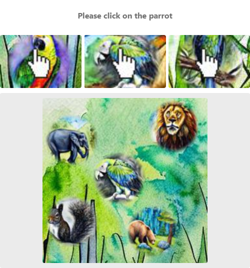

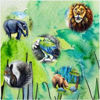

x shape: (1, 4, 536, 500)
prediction: [0.4612535  0.46058202]
absolute click: [154.058667   153.37381196]
relative click: (237.05866700410843, 347.37381196022034)
(237.05866700410843, 347.37381196022034)


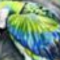

clicking on 237.05866700410843 347.37381196022034
Submitted captcha
Found Image: (500, 536)


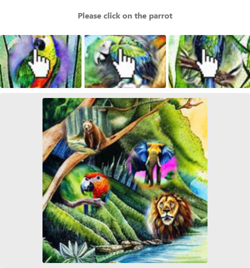

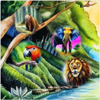

x shape: (1, 4, 536, 500)
prediction: [0.46083176 0.46476775]
absolute click: [153.91780829 154.76766211]
relative click: (236.91780829429626, 348.7676621079445)
(236.91780829429626, 348.7676621079445)


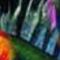

clicking on 236.91780829429626 348.7676621079445
Submitted captcha


In [4]:
%run v2_handler.py
v2h = V2_Handler(db2)
v2h.solve_v2(wd)